## Agregacion de Datos por Categoria

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
gender = ["Male","Female"]
income = ["Poor","Middle Class","Rich"]

In [3]:
n = 500
gender_data = []
income_data = []

for i in range(0,500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [4]:
gender_data[0:10]

['Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male']

In [5]:
height = 160 + 30*np.random.randn(n)
weight = 70 + 20*np.random.randn(n)
age = 50 + 18*np.random.randn(n)
income = 18000 + 3500*np.random.randn(n)

In [6]:
data = pd.DataFrame({
    "Social Status": income_data,
    "Gender" : gender_data,
    "Height": height,
    "Weight" : weight,
    "Age": age,
    "Income": income
})

In [7]:
data

,Social Status,Gender,Height,Weight,Age,Income
0,Middle Class,Female,119.503684,64.724197,29.222714,16575.410483
1,Rich,Male,157.806095,50.177678,52.405858,20119.683729
2,Middle Class,Male,171.409820,74.730498,48.473742,13652.881540
3,Poor,Male,214.210074,60.765478,80.043227,19047.269564
4,Rich,Female,190.068672,80.060699,45.894392,18585.550856
...,...,...,...,...,...,...
495,Rich,Male,202.052655,71.588834,7.968952,22313.565745
496,Poor,Female,169.503131,72.848241,80.083153,12335.776247
497,Middle Class,Male,158.588644,62.821360,33.284032,16824.284435
498,Poor,Male,185.306639,52.412387,33.146656,19282.537224


## Agrupacion de Datos

In [8]:
grouped_gender= data.groupby("Gender")

In [9]:
grouped_gender.groups

{'Female': Int64Index([  0,   4,   5,   6,  10,  14,  15,  16,  17,  21,
             ...
             481, 484, 485, 488, 490, 492, 493, 494, 496, 499],
            dtype='int64', length=240),
 'Male': Int64Index([  1,   2,   3,   7,   8,   9,  11,  12,  13,  18,
             ...
             476, 482, 483, 486, 487, 489, 491, 495, 497, 498],
            dtype='int64', length=260)}

In [10]:
for names,groups in grouped_gender: 
    print(names)
    print(groups)

Female
    Social Status  Gender      Height     Weight        Age        Income
0    Middle Class  Female  119.503684  64.724197  29.222714  16575.410483
4            Rich  Female  190.068672  80.060699  45.894392  18585.550856
5    Middle Class  Female  217.985610  63.083228  58.587507  21812.859088
6            Rich  Female  132.145930  63.832125  35.623229  17136.465678
10           Rich  Female  182.116708  38.019219  55.941684  18003.874614
..            ...     ...         ...        ...        ...           ...
492          Rich  Female  140.370789  85.488314  40.484391  18654.677025
493          Poor  Female  249.587384  75.156863  33.913189  18427.812557
494          Rich  Female  178.547631  95.815862  50.988371  16353.196718
496          Poor  Female  169.503131  72.848241  80.083153  12335.776247
499          Rich  Female  113.513193  47.094636  32.251449  17198.622659

[240 rows x 6 columns]
Male
    Social Status Gender      Height     Weight        Age        Income
1  

In [11]:
double_group=data.groupby(["Gender","Social Status"])

In [12]:
len(double_group)

6

In [13]:
for names,groups in double_group: 
    print(names)
    print(groups)

('Female', 'Middle Class')
    Social Status  Gender      Height     Weight        Age        Income
0    Middle Class  Female  119.503684  64.724197  29.222714  16575.410483
5    Middle Class  Female  217.985610  63.083228  58.587507  21812.859088
14   Middle Class  Female  166.258117  61.592585  53.340308  18930.571568
17   Middle Class  Female  126.495579  80.220242  56.163538  25816.298302
21   Middle Class  Female  137.694748  64.430503  58.128338  15739.156176
..            ...     ...         ...        ...        ...           ...
463  Middle Class  Female  179.529407  80.567708  62.962680  18470.767741
468  Middle Class  Female   97.369476  74.703014  30.178895  18999.775260
471  Middle Class  Female  178.794246  56.229737  37.386177  21240.546903
480  Middle Class  Female  154.497671  52.454350  51.993548  16325.903360
485  Middle Class  Female  168.799543  85.414969  33.433797  22580.821276

[74 rows x 6 columns]
('Female', 'Poor')
    Social Status  Gender      Height     W

## Operaciones sobre datos agrupados

In [14]:
double_group.sum()

Height       Weight          Age        Income
Gender Social Status                                                      
Female Middle Class   11885.057627  5071.613166  3682.937541  1.419214e+06
       Poor           12611.270869  5152.998753  3906.930556  1.383214e+06
       Rich           14332.413802  5900.355162  4514.138201  1.579066e+06
Male   Middle Class   15512.246195  7067.698601  4676.490476  1.775767e+06
       Poor            9859.558199  4405.318720  3260.633223  1.085516e+06
       Rich           15208.241585  6702.595429  4869.841972  1.766225e+06

In [15]:
double_group.mean()

Height     Weight        Age        Income
Gender Social Status                                                
Female Middle Class   160.608887  68.535313  49.769426  19178.567514
       Poor           161.682960  66.064087  50.088853  17733.516887
       Rich           162.868339  67.049490  51.297025  17943.931285
Male   Middle Class   155.122462  70.676986  46.764905  17757.665830
       Poor           159.025132  71.053528  52.590858  17508.330095
       Rich           155.186139  68.393831  49.692265  18022.704598

In [16]:
double_group.size()

Gender  Social Status
Female  Middle Class      74
        Poor              78
        Rich              88
Male    Middle Class     100
        Poor              62
        Rich              98
dtype: int64

In [17]:
double_group.describe()

Height                                                 \
                      count        mean        std         min         25%   
Gender Social Status                                                         
Female Middle Class    74.0  160.608887  28.220932   97.369476  139.664504   
       Poor            78.0  161.682960  29.302451  102.060973  141.873928   
       Rich            88.0  162.868339  32.026492   60.351938  141.328004   
Male   Middle Class   100.0  155.122462  30.816310   53.446672  133.229799   
       Poor            62.0  159.025132  28.404895   77.891311  141.991929   
       Rich            98.0  155.186139  30.741610   88.041727  135.645663   

                                                         Weight             \
                             50%         75%         max  count       mean   
Gender Social Status                                                         
Female Middle Class   164.747643  179.345617  230.470850   74.0  68.535313   
       Poor           161.302328  178.906424  249.587384   78.0  66.064087   
       Rich           163.495893  183.195478  245.216975   88.0  67.049490   
Male   Middle Class   156.456158  178.895133  224.799930  100.0  70.676986   
       Poor           159.103423  171.770187  224.991664   62.0  71.053528   
       Rich           153.585006  175.726682  232.567866   98.0  68.393831   

                      ...        Age             Income                \
                      ...        75%         max  count          mean   
Gender Social Status  ...                                               
Female Middle Class   ...  58.111511   85.881294   74.0  19178.567514   
       Poor           ...  59.827182  113.961607   78.0  17733.516887   
       Rich           ...  58.872758   80.994538   88.0  17943.931285   
Male   Middle Class   ...  58.128783   98.971828  100.0  17757.665830   
       Poor           ...  67.649160  108.215981   62.0  17508.330095   
       Rich           ...  61.432265  102.254961   98.0  18022.704598   

                                                                             \
                              std           min           25%           50%   
Gender Social Status                                                          
Female Middle Class   3568.986223   8202.235312  16836.563695  19136.930668   
       Poor           3422.068881  10075.992555  15366.987291  17494.304274   
       Rich           3463.466760  10603.404877  15323.426589  18038.549400   
Male   Middle Class   3551.891656   7634.912854  15459.896619  17236.609935   
       Poor           3811.404592  10980.697288  14833.767139  17367.487672   
       Rich           3182.237120   9412.710622  16266.428765  18108.093631   

                                                  
                               75%           max  
Gender Social Status                              
Female Middle Class   21310.634825  28804.586316  
       Poor           20292.606467  25936.943348  
       Rich           20010.213486  28364.374377  
Male   Middle Class   19967.631157  27402.060646  
       Poor           19685.912216  28774.311524  
       Rich           20146.559722  23736.349787  

[6 rows x 32 columns]

In [18]:
group_income=double_group["Income"]

In [19]:
group_income.describe()

count          mean          std           min  \
Gender Social Status                                                   
Female Middle Class    74.0  19178.567514  3568.986223   8202.235312   
       Poor            78.0  17733.516887  3422.068881  10075.992555   
       Rich            88.0  17943.931285  3463.466760  10603.404877   
Male   Middle Class   100.0  17757.665830  3551.891656   7634.912854   
       Poor            62.0  17508.330095  3811.404592  10980.697288   
       Rich            98.0  18022.704598  3182.237120   9412.710622   

                               25%           50%           75%           max  
Gender Social Status                                                          
Female Middle Class   16836.563695  19136.930668  21310.634825  28804.586316  
       Poor           15366.987291  17494.304274  20292.606467  25936.943348  
       Rich           15323.426589  18038.549400  20010.213486  28364.374377  
Male   Middle Class   15459.896619  17236.609935  19967.631157  27402.060646  
       Poor           14833.767139  17367.487672  19685.912216  28774.311524  
       Rich           16266.428765  18108.093631  20146.559722  23736.349787

In [20]:
double_group.aggregate({
     "Income":np.sum,
    "Age":np.mean
}
)

Income        Age
Gender Social Status                         
Female Middle Class   1.419214e+06  49.769426
       Poor           1.383214e+06  50.088853
       Rich           1.579066e+06  51.297025
Male   Middle Class   1.775767e+06  46.764905
       Poor           1.085516e+06  52.590858
       Rich           1.766225e+06  49.692265

In [21]:
double_group.aggregate({
     "Income":np.sum,
    "Height":lambda h : (np.mean(h))/np.std(h)
}
)

Income    Height
Gender Social Status                        
Female Middle Class   1.419214e+06  5.729974
       Poor           1.383214e+06  5.553442
       Rich           1.579066e+06  5.114569
Male   Middle Class   1.775767e+06  5.059137
       Poor           1.085516e+06  5.644214
       Rich           1.766225e+06  5.074035

In [22]:
double_group.aggregate([np.mean,np.sum,np.std])

Height                              Weight  \
                            mean           sum        std       mean   
Gender Social Status                                                   
Female Middle Class   160.608887  11885.057627  28.220932  68.535313   
       Poor           161.682960  12611.270869  29.302451  66.064087   
       Rich           162.868339  14332.413802  32.026492  67.049490   
Male   Middle Class   155.122462  15512.246195  30.816310  70.676986   
       Poor           159.025132   9859.558199  28.404895  71.053528   
       Rich           155.186139  15208.241585  30.741610  68.393831   

                                                    Age               \
                              sum        std       mean          sum   
Gender Social Status                                                   
Female Middle Class   5071.613166  18.284014  49.769426  3682.937541   
       Poor           5152.998753  20.040299  50.088853  3906.930556   
       Rich           5900.355162  21.573906  51.297025  4514.138201   
Male   Middle Class   7067.698601  18.481371  46.764905  4676.490476   
       Poor           4405.318720  21.909524  52.590858  3260.633223   
       Rich           6702.595429  18.087553  49.692265  4869.841972   

                                       Income                             
                            std          mean           sum          std  
Gender Social Status                                                      
Female Middle Class   16.593691  19178.567514  1.419214e+06  3568.986223  
       Poor           19.231742  17733.516887  1.383214e+06  3422.068881  
       Rich           13.644235  17943.931285  1.579066e+06  3463.466760  
Male   Middle Class   18.499428  17757.665830  1.775767e+06  3551.891656  
       Poor           22.509176  17508.330095  1.085516e+06  3811.404592  
       Rich           19.533949  18022.704598  1.766225e+06  3182.237120

## Filtrado de Datos

In [23]:
double_group["Age"].filter(lambda x: x.sum()>2400)

0      29.222714
1      52.405858
2      48.473742
3      80.043227
4      45.894392
         ...    
495     7.968952
496    80.083153
497    33.284032
498    33.146656
499    32.251449
Name: Age, Length: 500, dtype: float64

In [26]:
zscore = lambda x : (x - x.mean())/x.std()

In [29]:
z_score = double_group.transform(zscore)

In [30]:
import matplotlib.pyplot as plt

(array([  2.,   9.,  37., 100., 105., 139.,  62.,  34.,   9.,   3.]),
 array([-3.22851904, -2.57354562, -1.9185722 , -1.26359878, -0.60862536,
         0.04634806,  0.70132148,  1.3562949 ,  2.01126832,  2.66624174,
         3.32121516]),
 <a list of 10 Patch objects>)

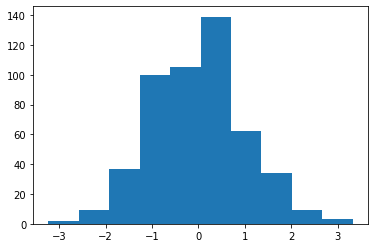

In [32]:
plt.hist(z_score["Age"])

In [34]:
fill_na_mean = lambda x : x.fillna(x.mean())

In [35]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,119.503684,64.724197,29.222714,16575.410483
1,157.806095,50.177678,52.405858,20119.683729
2,171.409820,74.730498,48.473742,13652.881540
3,214.210074,60.765478,80.043227,19047.269564
4,190.068672,80.060699,45.894392,18585.550856
...,...,...,...,...
495,202.052655,71.588834,7.968952,22313.565745
496,169.503131,72.848241,80.083153,12335.776247
497,158.588644,62.821360,33.284032,16824.284435
498,185.306639,52.412387,33.146656,19282.537224


# Operaciones Utiles

In [36]:
double_group.head(1)

,Social Status,Gender,Height,Weight,Age,Income
0,Middle Class,Female,119.503684,64.724197,29.222714,16575.410483
1,Rich,Male,157.806095,50.177678,52.405858,20119.683729
2,Middle Class,Male,171.409820,74.730498,48.473742,13652.881540
3,Poor,Male,214.210074,60.765478,80.043227,19047.269564
4,Rich,Female,190.068672,80.060699,45.894392,18585.550856
15,Poor,Female,176.630230,98.559493,51.891592,10464.027459


In [37]:
double_group.tail(1)

,Social Status,Gender,Height,Weight,Age,Income
485,Middle Class,Female,168.799543,85.414969,33.433797,22580.821276
495,Rich,Male,202.052655,71.588834,7.968952,22313.565745
496,Poor,Female,169.503131,72.848241,80.083153,12335.776247
497,Middle Class,Male,158.588644,62.821360,33.284032,16824.284435
498,Poor,Male,185.306639,52.412387,33.146656,19282.537224
499,Rich,Female,113.513193,47.094636,32.251449,17198.622659


In [38]:
double_group.nth(82)

Height     Weight        Age        Income
Gender Social Status                                                
Female Rich           190.138796  55.469060  40.160772  22354.141436
Male   Middle Class   173.021859  71.331985  70.190513  14539.419835
       Rich           152.853050  57.841983  39.840877  20726.166374

In [40]:
data_sorted = data.sort_values(["Age","Income"])

In [41]:
data_sorted

,Social Status,Gender,Height,Weight,Age,Income
141,Poor,Female,133.775023,33.878203,-12.001192,17796.266540
101,Middle Class,Male,150.428079,74.638028,-8.895395,14662.554468
267,Poor,Male,144.031204,34.399325,2.832948,15651.600780
394,Rich,Male,146.394627,59.662930,3.540546,15695.142397
272,Poor,Male,184.077941,84.057164,6.575303,17677.181686
...,...,...,...,...,...,...
182,Poor,Female,146.122592,98.216683,97.440336,25722.835710
41,Middle Class,Male,126.064224,64.918763,98.971828,21752.492085
289,Rich,Male,135.343230,91.586485,102.254961,20982.066454
284,Poor,Male,136.634055,57.247819,108.215981,12918.086503


## Conjunto de entrenamiento y conjunto de testing

In [42]:
data = pd.read_csv(r"C:\Users\Asus\Desktop\Datasets\datasets\customer-churn-model\Customer Churn Model.txt")

In [43]:
len(data)

3333

# Dividir utilizando la funcion normal

In [44]:
a = np.random.randn(len(data))

(array([  1.,   3.,  46., 186., 538., 891., 861., 574., 194.,  39.]),
 array([-4.34931838, -3.62952342, -2.90972846, -2.18993351, -1.47013855,
        -0.75034359, -0.03054864,  0.68924632,  1.40904127,  2.12883623,
         2.84863119]),
 <a list of 10 Patch objects>)

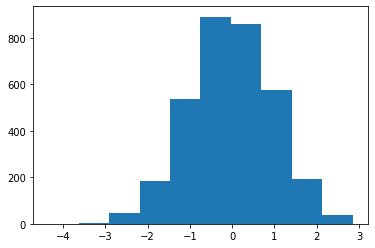

In [45]:
plt.hist(a)

In [46]:
check = (a<0.8)

In [48]:
check

array([ True,  True, False, ...,  True, False,  True])

## Con la libreria Sklearn

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
train , test = train_test_split(data, test_size=0.2)

In [58]:
len(train)

2666

In [59]:
len(test)

667

# Usando una funcion de shuffle

In [60]:
import numpy as np

In [61]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [62]:
import sklearn

In [64]:
data = sklearn.utils.shuffle(data)

In [65]:
cut_id = int(0.75*len(data))

In [68]:
train = data[:cut_id]
test = data[cut_id+1:]

In [69]:
len(train)

2499